In [14]:
#importing the necessary package for the usage of 
import matplotlib.pyplot as plt # for ploting the file if we needed for visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
import pandas as pd #pandas package 
import numpy as np #numpy package 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for analysing the LDA

In [18]:
#header_list = ["baseline value "," accelerations","fetal_health "]
df = pd.read_csv("train.csv")#names=header_list)
df.head() #head of the the data
df.shape # shape of the data
df.info() # info of the data
df.describe() # describtion of the data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1700 non-null   float64
 1   accelerations                                           1700 non-null   float64
 2   fetal_movement                                          1700 non-null   float64
 3   uterine_contractions                                    1700 non-null   float64
 4   light_decelerations                                     1700 non-null   float64
 5   severe_decelerations                                    1700 non-null   float64
 6   prolongued_decelerations                                1700 non-null   float64
 7   abnormal_short_term_variability                         1700 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,133.213529,0.003212,0.010211,0.004356,0.001899,0.000004,0.000158,46.508824,1.345353,9.738235,...,93.121176,163.842353,4.088824,0.324118,137.128235,134.461176,137.862941,19.046471,0.324706,1.304706
std,9.873344,0.003888,0.050124,0.002943,0.002976,0.000059,0.000587,17.276801,0.898037,18.227303,...,29.520766,17.651851,2.927774,0.683795,16.608926,15.616890,14.552801,29.575447,0.608340,0.614788
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,75.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,48.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,135.500000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.006000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,159.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


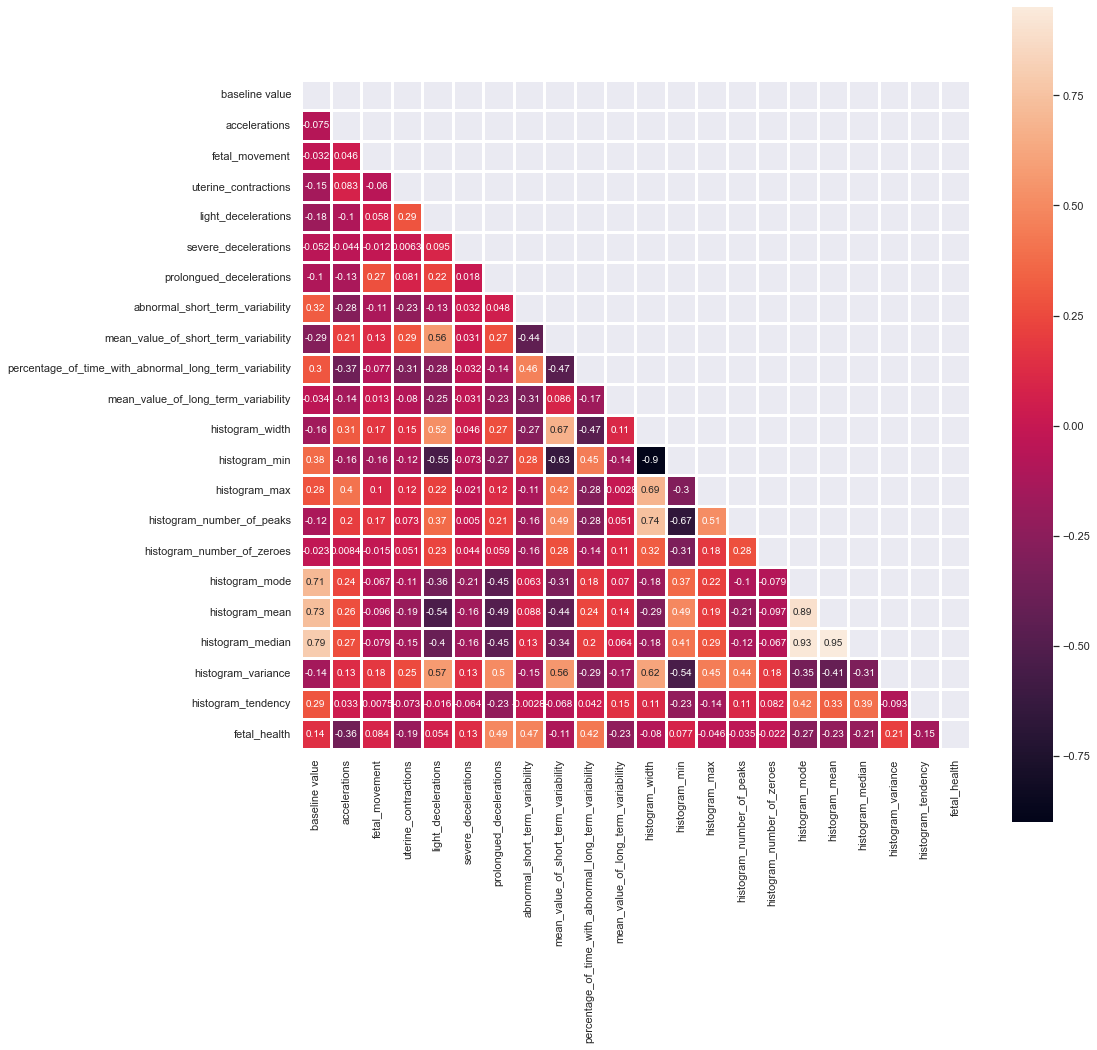

In [19]:
# for the visualization of the data for our understanding
Target = df["fetal_health"]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
 f, ax = plt.subplots(figsize=(15, 15))
 ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="rocket",annot=True)

In [21]:
#for avoiding the duplicates of the data
df_dup = df.drop_duplicates(subset = None , keep = 'first', inplace = False)

In [23]:
print("Count of type 1.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==1.0])) #for counting the data 
print("Count of type 2.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==2.0]))
print("Count of type 3.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==3.0]))


Count of type 1.0 fetal health in the dataset  1323
Count of type 2.0 fetal health in the dataset  236
Count of type 3.0 fetal health in the dataset  141


In [25]:
 #for locating the data 
X = df_dup.iloc[:,:-1]
y = df_dup.iloc[:,-1]

In [27]:
#for scaling the data for the usage 
scale = StandardScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=df_dup.iloc[:,:-1].columns)


In [30]:
#for resampling the data over a random state
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_ros, y_ros = ROS.fit_resample(X,y)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_ros))


Resampled dataset shape Counter({1.0: 1317, 3.0: 1317, 2.0: 1317})


In [33]:
 #for allocating the test and train data for the predicting
import statsmodels.api as sm
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1354, 22)
y_train (1354,)
X_test (339, 22)
y_test (339,)


In [36]:
 #for the preprocessing method 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# for discriminant analysis method 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [53]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       2., 3., 1., 1., 1., 1., 3., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 3., 1., 1., 2., 1., 1., 1., 2., 1.,
       1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2.,
       1., 3., 1., 3., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 3., 2., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 2., 1.

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.0f}".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 86


In [56]:
Validation_test = pd.read_csv('test.csv') 
print('Validation_test',Validation_test.shape)

Validation_test (426, 21)


In [65]:
from pandas import DataFrame
data = [y_pred]
df = DataFrame(data)
export_csv = df.to_csv (r'output.csv', index = None, header=True) # here you have to write path, where result file will be
print (df)

   0    1    2    3    4    5    6    7    8    9    ...  329  330  331  332  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  ...  1.0  2.0  1.0  1.0   

   333  334  335  336  337  338  
0  1.0  1.0  1.0  1.0  1.0  1.0  

[1 rows x 339 columns]
